# Project - Foundations of Python Foundations: Food Delivery App Data Analysis

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')

In [3]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

df.restaurant_name = df.restaurant_name.astype('category')
df.cuisine_type = df.cuisine_type.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')

In [4]:
#summary statistics for numerical variables
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### How many orders are not rated?

In [8]:
print(df['rating'].value_counts())
print(df['rating'].count())

#I used dataframe['column (variable to explore)'].value_counts() to calculate the the number of unique values
#within the 'rating' variable. The rating variable appears numerical but the data is discrete and only houses the 
#values of '3','4','5', and 'Not given'. This means that it would make sense to treat it as a categorical variable
#in terms of looking for the number of unique values and their counts within the data. 

#I then used .count() in order to obtain the overall number of individual values within the 'rating' variable
#which is essentially the number of rows within the column. This gives us the total number of orders 
#within the dataset. 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
1898


#### Observations:
There were 736 of the 1898 orders that were categorized as "not given" (were not rated). 

# Exploratory Data Analysis (EDA)

### Univariate Analysis

In [5]:
def histogram_boxplot(data, feature, figsize=(12,7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)
    sns.boxplot(data=df, x=feature, ax=ax_box2, showmeans=True, color="yellow")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins) if bins else sns.histplot(data=data, 
                                                                                                  x=feature, 
                                                                                                  kde=kde, 
                                                                                                  ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="purple", linestyle="-")

mean: 16.498851422550082
mode: 0    12.18
dtype: float64
median: 14.14


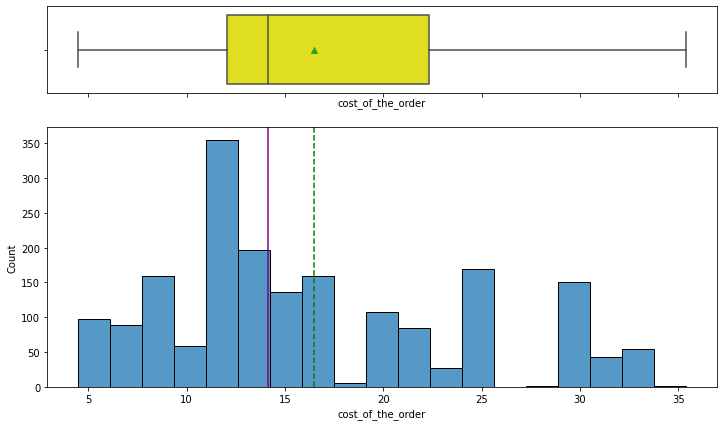

In [6]:
histogram_boxplot(df, 'cost_of_the_order')

print("mean:", df['cost_of_the_order'].mean())
print("mode:", df['cost_of_the_order'].mode())
print("median:", df['cost_of_the_order'].median())

<b>Observations: </b>
- the cost of the order distribution is slightly right skewed
- the majority of orders cost about 12 dollars (12.18 to be exact)
- the median cost of orders is just below 15 dollars (median = 14.14)
- the cost of orders distribution ranges from just under 5 dollars to just over 35 dollars
- there are no outliers within this data

mean: 27.371970495258168
mode: 0    21
dtype: int64
median: 27.0


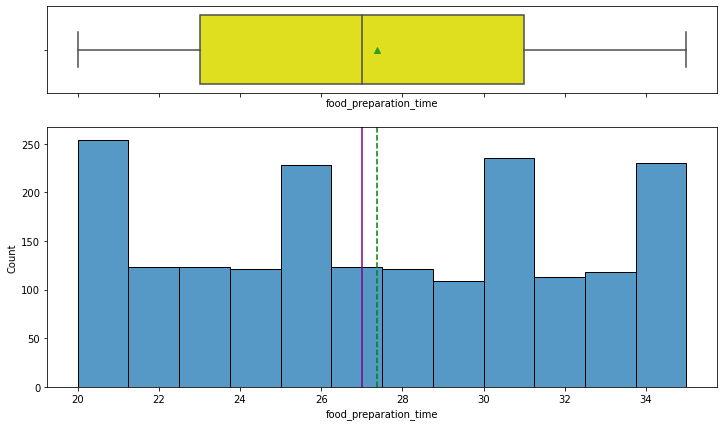

In [7]:
histogram_boxplot(df, 'food_preparation_time')

print("mean:", df['food_preparation_time'].mean())
print("mode:", df['food_preparation_time'].mode())
print("median:", df['food_preparation_time'].median())

<b>Observations: </b>
- the distribution of the food preparation time shows no skewness and is evenly spread throughout the values. the mean and median are very close together and both fall in the middle of the data. the distribution shows a very slight right skew. 
- the majority of orders take about 21 minutes to prepare
- the median time to prepare orders is 27 minutes
- the food preparation time distribution ranges from 20 minutes to 35 minutes
- there are no outliers within this data

mean: 24.161749209694417
mode: 0    24
dtype: int64
median: 25.0


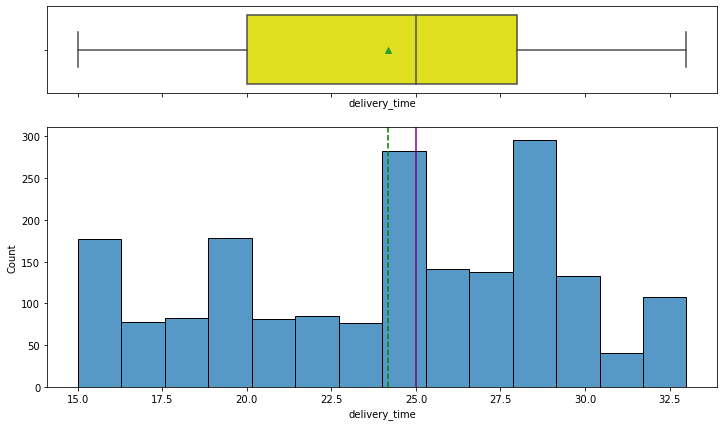

In [8]:
histogram_boxplot(df, 'delivery_time')

print("mean:", df['delivery_time'].mean())
print("mode:", df['delivery_time'].mode())
print("median:", df['delivery_time'].median())

<b>Observations: </b>
- the distribution of the food delivery times shows a slight left skew. 
- the majority of orders take about 24 minutes to be delivered
- the median time to deliver orders is 25 minutes
- the food delivery time distribution ranges from 15 minutes to 33 minutes
- there are no outliers within this data

In [9]:
def labeled_barplot(data, feature, perc=False, n=None):
    total=len(data[feature]) 
    count=data[feature].nunique() 
    if n is None:
        plt.figure(figsize= (count+1, 5))
    else:
        plt.figure(figsize= (n+1, 5))
    
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, order=data[feature].value_counts().index[:n].sort_values())
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height() 
        x = p.get_x() + p.get_width() / 2 
        y = p.get_height()

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points")

    plt.xticks(rotation = 60)
    plt.show()

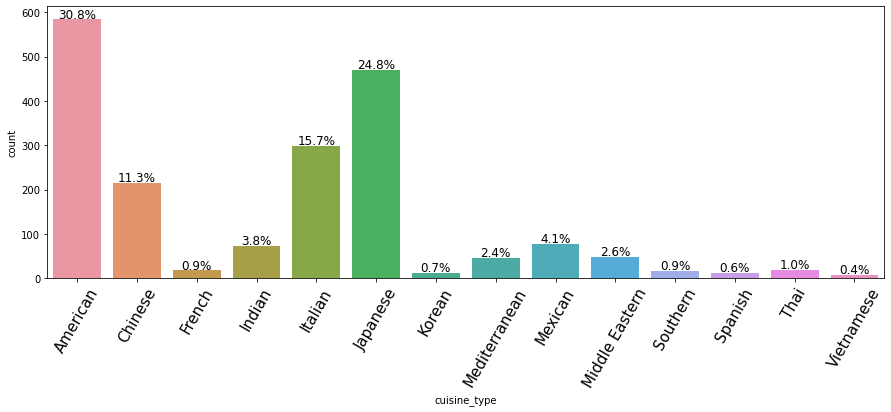

In [10]:
#bar plot for cuisine_type

labeled_barplot(df,'cuisine_type',perc=True)

<b>Observations: </b>
- American food makes up 30.8% of all orders
- The next 3 most common cuisine types ordered are japanese (24.8%), italian (15.7%), and chinese (11.3%) 
- All other cuisine types each make up less than 5% of all orders

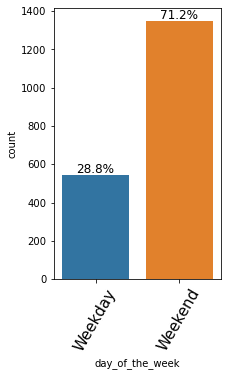

In [11]:
#barplot for day_of_the_week

labeled_barplot(df,'day_of_the_week',perc=True)

<b>Observations: </b>
- A majority of orders are placed on the weekend (71.2%)
- only 28.8% of all orders are placed on a weekday

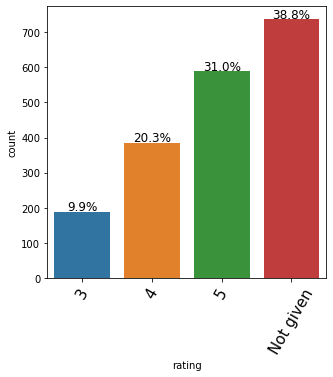

In [12]:
#barplot for rating

labeled_barplot(df,'rating',perc=True)

<b>Observations: </b>
- Almost half (38.8%) of all orders are not given a rating at all
- 31% of orders are given a full 5 rating
- orders with a minimum score of 3 only occur 9.9% of the time

### Top 5 restaurants that have received the highest number of orders

In [13]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top 5 restaurants with the highest number of orders in descending order. The value_counts() function defaults to sorting in descending order. 

### Most popular cuisine on weekends

In [14]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
the most popular cuisine type on the weekends is first American (followed by Japanese, then Italian)

### Multivariate Analysis

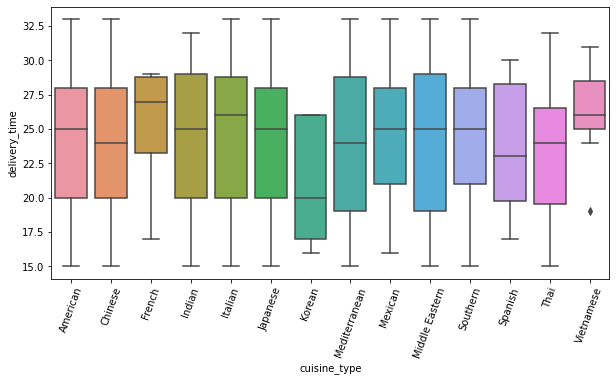

In [16]:
#comparing cuisine_type (categorical variable) vs delivery_time (numerical variable) using a boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x ='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=70)
plt.show()

<b>Observations: </b>
The distribution of delivery time varies alot between the type of food ordered compared to the prep time. Korean food has the fastest average overall delivery times compared to every other food type with an average of around 20 minutes. Vietnamese and Italian food have the slowest overall delivery times with an average of around 26 minutes. The only food type that has any ouutlier data is Vietnamese, which had one order was delivered very quickly compared to most of their other orders (in around 19 minutes). 

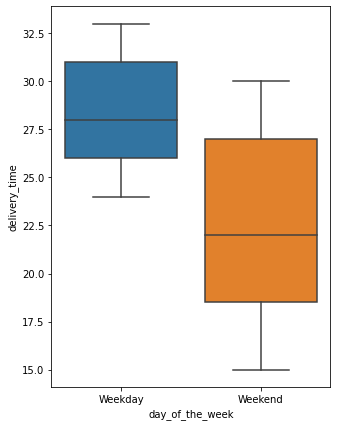

In [18]:
#comparing day_of_the_week (categorical variable) vs delivery_time (numerical variable) using a boxplot

plt.figure(figsize=(5,7))
sns.boxplot(x ='day_of_the_week', y='delivery_time', data=df)
plt.xticks(rotation=0)
plt.show()

<b>Observations: </b>
On average, orders tend to be delivered much slower overall (greater delivery times) on the weekdays compared to the weekends. There is a wider range of delivery times seen on the weekends. The average delivery time on the weekdays is about 28 minutes whereas the average delivery time on the weekends is only around 22 minutes. 

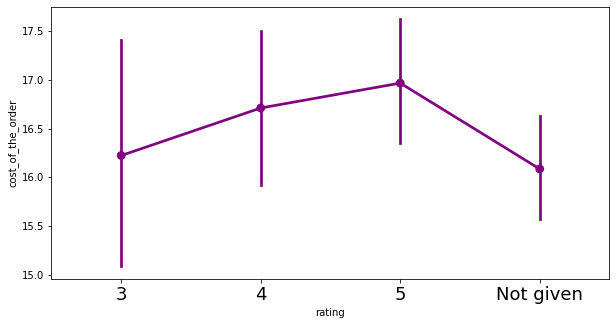

In [31]:
#comparing rating (categorical variable) vs cost (numerical variable) using a pointplot

plt.figure(figsize=(10,5))
sns.pointplot(x ='rating', y='cost_of_the_order', data=df, order=['3','4','5','Not given'], color = "purple")
plt.xticks(size=18, rotation=0)
plt.show()

<b>Observations: </b>
Orders with higher ratings tend to be more expensive on average. Orders that are on the less expensive side of the range are less likely to be given a rating at all. 

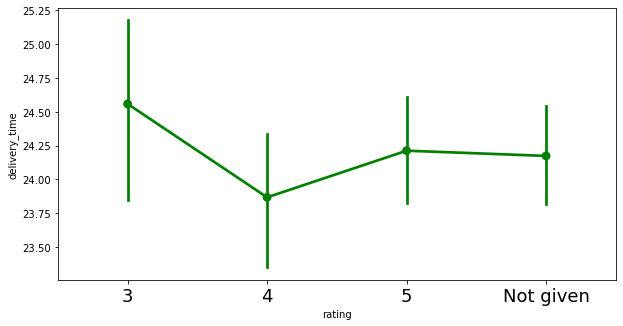

In [33]:
#comparing rating (categorical variable) vs delivery_time (numerical variable) using a pointplot

plt.figure(figsize=(10,5))
sns.pointplot(x ='rating', y='delivery_time', data=df, order=['3','4','5','Not given'], color = "green")
plt.xticks(size=18, rotation=0)
plt.show()

<b>Observations: </b>
Orders that are rated a 3 have a higher average delivery time compared to order that are rated higher. The higher 2 ratings (4 and 5) have lower average delivery times (orders are delivered faster). Orders that are not given a rating have an average delivery time of about 24.2 minutes. 

### Analyze of the delivery time of the orders on weekdays and weekends
- the mean delivery time on weekdays and weekends

In [37]:
#finding the mean of the delivery_time column by day of the week using the groupby function

day_dev_time = df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()
print(day_dev_time)

  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations:
The mean delivery time on the weekdays is 28.34 minutes while the mean delivery time on the weekends is only 22.47 minutes. Weekend orders are delivered quicker on average than weekday orders. 

### Conclusion and Recommendations

#### Key Insights:

##### Making delivery times quicker (how and why): 
- How: The app may be able to decrease overall delivery times on the weekdays by incentivizing drivers to run orders. Weekdays have a slower delivery time compared to weekends (we found this in Q12). So, getting more delivery drivers out on the road on the weekdays would be beneficial to getting orders to customer quicker. 
- Why: As we found in Q12, orders that are rated lower (rated a 3) have a higher average delivery time (are delivered slower) compared to orders that are rated a 4 or a 5. Therefore, orders that are delivered faster, are rated higher on average. Therefore, orders may start receiving higher ratings if they are delivered faster. This would also bring down the total overall delivery time. 

##### Many orders are not rated at all. How to fix this: 
- As we found in Q5, 736 of the 1898 orders within the dataset did not receive a rating at all. This is almost 40% (37.8%) of all orders that were completed within this dataset. Orders that are not rating result in the restaurant potentially not being eligible for promotional offers that are based on number of overall rating and overall average rating. 
- Providing a rating with feedback could help provide valuable insights on how to improve the customer experience whether that be on the restaruant side or the delivery side. 
- Potential fix: The app could benefit from implementing a system that will email a customer shortly after an order is completed to remind them to rate their order if they havent done so yet. This could be further pushed to the customer in a similar style employed by Uber, by requiring a rating on a previous order before a new order can be placed within the app. 

##### Promoting restaurants with low order numbers: 
- Using this dataset, the app could target the restaurants or cuisine types with the lowest overall number of orders placed. For example, based on the output of Q7, the app could advertise promotional offers for discounted delivery for orders placed from Klong, Kambi Ramen House, Il Bambino, Hunan Manor, and Lamarca Pasta in order to incentivize more customers ordering food from the less popular restaurants. Ideally, a customer is more likely to order from these places again in the future if they have already had a pleasant experience with that restaurant. Their next order would yeild more profit as well as it would likely not have a discount on it. 